In [58]:
import pandas as pd
import calendar
import hvplot.pandas
from sqlalchemy import create_engine
import csv
import numpy as np
import matplotlib.pyplot as plt
import warnings
import datetime as dt
from datetime import datetime, timedelta
import yfinance as yf



warnings.filterwarnings('ignore')

In [59]:
# import house csv data
senator_csv = ('senate_stock_csv.csv')

# read csv with pandas
senator_df = pd.read_csv(senator_csv).dropna()

# view the df
print(senator_df)

     transaction_date   owner ticker asset_type            type     amount  \
0           4/18/2023  Spouse    ESS      Stock     Sale (Full)   $15,000    
1           4/18/2023    Self    ESS      Stock     Sale (Full)   $15,000    
3            4/4/2023  Spouse    UPS      Stock     Sale (Full)   $15,000    
4            4/4/2023  Spouse    MCD      Stock  Sale (Partial)   $15,000    
5            4/4/2023  Spouse    DUK      Stock     Sale (Full)   $50,000    
...               ...     ...    ...        ...             ...        ...   
7627        1/16/2015    Self    NOG      Stock        Purchase   $50,000    
7628         1/6/2015    Self    FCX      Stock     Sale (Full)  $100,000    
7640       12/12/2014  Spouse    XOM      Stock     Sale (Full)   $15,000    
7641       12/19/2014  Spouse     BA      Stock        Purchase   $15,000    
7642       12/12/2014  Spouse    BAC      Stock     Sale (Full)   $15,000    

           party state                           industry  \
0 

In [60]:
# separate senators by party and amount
keep_columns = ['party', 'amount']

# initiate variable with keep_columns
senator_df = senator_df[keep_columns]

# view resutls
print(senator_df)

           party     amount
0       Democrat   $15,000 
1       Democrat   $15,000 
3     Republican   $15,000 
4     Republican   $15,000 
5     Republican   $50,000 
...          ...        ...
7627  Republican   $50,000 
7628  Republican  $100,000 
7640  Republican   $15,000 
7641  Republican   $15,000 
7642  Republican   $15,000 

[5501 rows x 2 columns]


In [61]:
democrat_party = senator_df[senator_df['party'] == 'Democrat']
republican_party = senator_df[senator_df['party'] == 'Republican']

print("Democrat DataFrame:")
print(democrat_party)

print("\nRepublican DataFrame:")
print(republican_party)


Democrat DataFrame:
         party    amount
0     Democrat  $15,000 
1     Democrat  $15,000 
6     Democrat  $50,000 
7     Democrat  $15,000 
8     Democrat  $50,000 
...        ...       ...
7610  Democrat  $15,000 
7612  Democrat  $50,000 
7613  Democrat  $50,000 
7615  Democrat  $50,000 
7616  Democrat  $15,000 

[1340 rows x 2 columns]

Republican DataFrame:
           party     amount
3     Republican   $15,000 
4     Republican   $15,000 
5     Republican   $50,000 
19    Republican   $15,000 
20    Republican   $15,000 
...          ...        ...
7627  Republican   $50,000 
7628  Republican  $100,000 
7640  Republican   $15,000 
7641  Republican   $15,000 
7642  Republican   $15,000 

[4134 rows x 2 columns]


In [62]:
democrat_party = democrat_party[keep_columns]
print(democrat_party)

democrat_party['amount'] = democrat_party['amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)

dparty_total_sum_amount = democrat_party['amount'].sum()
print(dparty_total_sum_amount)

         party    amount
0     Democrat  $15,000 
1     Democrat  $15,000 
6     Democrat  $50,000 
7     Democrat  $15,000 
8     Democrat  $50,000 
...        ...       ...
7610  Democrat  $15,000 
7612  Democrat  $50,000 
7613  Democrat  $50,000 
7615  Democrat  $50,000 
7616  Democrat  $15,000 

[1340 rows x 2 columns]
51985000.0


In [63]:
republican_party = republican_party[keep_columns]
print(republican_party)


republican_party['amount'] = republican_party['amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)

rparty_total_sum_amount = republican_party['amount'].sum()
display(rparty_total_sum_amount)


           party     amount
3     Republican   $15,000 
4     Republican   $15,000 
5     Republican   $50,000 
19    Republican   $15,000 
20    Republican   $15,000 
...          ...        ...
7627  Republican   $50,000 
7628  Republican  $100,000 
7640  Republican   $15,000 
7641  Republican   $15,000 
7642  Republican   $15,000 

[4134 rows x 2 columns]


388695000.0

In [64]:
party_combine = pd.DataFrame({
    'party': ['Democrat', 'Republican'],
    'total_sum_amount': [dparty_total_sum_amount, rparty_total_sum_amount]
})





# use hvplot to create a pie chart
party_colors = {'Democrat': 'blue', 'Republican': 'red'}
bar_chart = party_combine.hvplot.bar(
    x='party',
    y='total_sum_amount',
    ylabel="Total Trades Amounts In Millions",
    yformatter="%0.0f",
    color='party',
    cmap = party_colors,  # Specify custom colors for each bar
    rot=0,
    title='Senator Trade Totals By Party'
)

# Show the chart using hvplot
bar_chart

:Bars   [party]   (total_sum_amount)

In [65]:
# Next Compare Ticker Data

In [66]:
# read in senator csv
senator_csv = ('senate_stock_csv.csv')
senator_df = pd.read_csv(senator_csv).dropna()
# preview senator dataframe
senator_df

,transaction_date,owner,ticker,asset_type,type,amount,party,state,industry,senator
0,4/18/2023,Spouse,ESS,Stock,Sale (Full),"$15,000",Democrat,RI,Real Estate Investment Trusts,Sheldon Whitehouse
1,4/18/2023,Self,ESS,Stock,Sale (Full),"$15,000",Democrat,RI,Real Estate Investment Trusts,Sheldon Whitehouse
3,4/4/2023,Spouse,UPS,Stock,Sale (Full),"$15,000",Republican,WV,Trucking Freight/Courier Services,Shelley Moore Capito
4,4/4/2023,Spouse,MCD,Stock,Sale (Partial),"$15,000",Republican,WV,Restaurants,Shelley Moore Capito
5,4/4/2023,Spouse,DUK,Stock,Sale (Full),"$50,000",Republican,WV,Power Generation,Shelley Moore Capito
...,...,...,...,...,...,...,...,...,...,...
7627,1/16/2015,Self,NOG,Stock,Purchase,"$50,000",Republican,ND,Oil & Gas Production,John Hoeven
7628,1/6/2015,Self,FCX,Stock,Sale (Full),"$100,000",Republican,ND,Precious Metals,John Hoeven
7640,12/12/2014,Spouse,XOM,Stock,Sale (Full),"$15,000",Republican,KS,Integrated oil Companies,Pat Roberts
7641,12/19/2014,Spouse,BA,Stock,Purchase,"$15,000",Republican,KS,Aerospace,Pat Roberts


In [67]:
# modify dataframe to contain desired values
ticker_df = senator_df.drop(columns=['transaction_date','owner','asset_type','type','amount','state','senator'])
top_five = ['Major Banks',
            'Major Pharmaceuticals',
            'Semiconductors',
            'Computer Software: Prepackaged Software',
            'Computer Manufacturing'
           ]
# get industry top 5
ticker_df = ticker_df.loc[ticker_df['industry'].isin(top_five)].reset_index().drop(columns='index')
# find the tallys
ticker_df = ticker_df.value_counts()
# view the df
ticker_df

ticker  party       industry                               
AAPL    Republican  Computer Manufacturing                     125
MSFT    Republican  Computer Software: Prepackaged Software     80
BAC     Republican  Major Banks                                 75
PFE     Republican  Major Pharmaceuticals                       71
WFC     Republican  Major Banks                                 47
                                                              ... 
SHOP    Republican  Computer Software: Prepackaged Software      1
SMTC    Republican  Semiconductors                               1
SNOW    Democrat    Computer Software: Prepackaged Software      1
SNPS    Democrat    Computer Software: Prepackaged Software      1
ALGM    Democrat    Semiconductors                               1
Name: count, Length: 155, dtype: int64

In [68]:
# plot the data as a bar chart by industry
ticker_df.hvplot.bar(
    title="Ticker Count by Industry",
    x='ticker',
    groupby='industry',
    width=1200,
    height=400,
    xlabel='Ticker',
    ylabel='Count',
    widget_location='right',
    rot=30
)

Row
    [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', widget_location='right', width=1200)
    [1] WidgetBox(align=('end', 'center'))
        [0] Select(margin=(20, 20, 20, 20), name='industry', options=['Computer Manufacturing',...], value='Computer Manufacturing', width=250)

In [69]:
#Regrab data to categorize by senator
ticker_senator_df = senator_df.drop(columns=['transaction_date','owner','asset_type','type','amount','state','industry'])
top_five = ['David Perdue',
            'Tommy Tuberville',
            'Sheldon Whitehouse',
            'Pat Roberts',
            'Shelley Moore Capito'
           ]
ticker_senator_df = ticker_senator_df.loc[ticker_senator_df['senator'].isin(top_five)].reset_index().drop(columns='index')
ticker_senator_df = ticker_senator_df.value_counts()
ticker_senator_df

ticker  party       senator             
DISCA   Republican  David Perdue            74
URBN    Republican  David Perdue            65
CZR     Republican  David Perdue            63
PFE     Republican  David Perdue            62
FEYE    Republican  David Perdue            60
                                            ..
A       Republican  Tommy Tuberville         1
JKHY    Republican  Shelley Moore Capito     1
JCI     Republican  David Perdue             1
ITW     Republican  Tommy Tuberville         1
ZTS     Republican  Tommy Tuberville         1
Name: count, Length: 644, dtype: int64

In [70]:
# plot the data as a bar chart by senator
ticker_senator_df.hvplot.bar(
    title="Ticker Count by Senator",
    x='ticker',
    groupby='senator',
    width=1200,
    height=400,
    xlabel='Ticker',
    ylabel='Count',
    widget_location='right',
    rot=30
)

Row
    [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', widget_location='right', width=1200)
    [1] WidgetBox(align=('end', 'center'))
        [0] Select(margin=(20, 20, 20, 20), name='senator', options=['David Perdue', ...], value='David Perdue', width=250)

In [71]:
# Separate By State


In [72]:
csv_path = 'cleaned_senators_data.csv'


In [73]:
# Read in the CSV as a DataFrame
senators_df = pd.read_csv(csv_path)
senators_df.head()

,state,senator,Unnamed: 2,zip
0,RI,Sheldon Whitehouse,NaN,2903.0
1,RI,Sheldon Whitehouse,NaN,2903.0
2,WV,Shelley Moore Capito,NaN,25305.0
3,WV,Shelley Moore Capito,NaN,25305.0
4,WV,Shelley Moore Capito,NaN,25305.0


In [74]:
# Sort ascending (default)
sort_senators = senators_df.sort_values("state")
sort_senators

,state,senator,Unnamed: 2,zip
3671,AK,Dan Sullivan,NaN,NaN
304,AK,Dan Sullivan,NaN,99801.0
303,AK,Dan Sullivan,NaN,99801.0
302,AK,Dan Sullivan,NaN,99801.0
301,AK,Dan Sullivan,NaN,99801.0
...,...,...,...,...
4209,WV,Shelley Moore Capito,NaN,NaN
3325,WV,Shelley Moore Capito,NaN,NaN
1015,WY,Cynthia M. Lummis,NaN,NaN
1014,WY,Cynthia M. Lummis,NaN,NaN


In [75]:
sort_senators

,state,senator,Unnamed: 2,zip
3671,AK,Dan Sullivan,NaN,NaN
304,AK,Dan Sullivan,NaN,99801.0
303,AK,Dan Sullivan,NaN,99801.0
302,AK,Dan Sullivan,NaN,99801.0
301,AK,Dan Sullivan,NaN,99801.0
...,...,...,...,...
4209,WV,Shelley Moore Capito,NaN,NaN
3325,WV,Shelley Moore Capito,NaN,NaN
1015,WY,Cynthia M. Lummis,NaN,NaN
1014,WY,Cynthia M. Lummis,NaN,NaN


In [76]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the sfo_neighborhoods_census_data.csv file from the Resources folder
#importing and parsing census daata by year
senators_df = pd.read_csv(('cleaned_senators_sort_data.csv'), parse_dates=False, infer_datetime_format=True, index_col='state')

# Review the first and last five rows of the DataFrame
senators_df.head()

,senator,zip
state,,
AK,Dan Sullivan,99801
AK,Dan Sullivan,99801
AK,Dan Sullivan,99801
AK,Dan Sullivan,99801
AK,Dan Sullivan,99801


In [77]:
#groupby state
combine_trans = senators_df.groupby('state').count()

#drop zips
combine_trans.drop(columns=['zip'], inplace=True)
combine_trans

,senator
state,
AK,82
AL,676
AR,1
CO,53
DE,651
GA,2553
IL,23
KS,589
KY,22


In [78]:
# group by 'state'
combine_trans = senators_df.groupby('state').count()

# drop zip column
combine_trans.drop(columns=['zip'], inplace=True)
combine_trans

,senator
state,
AK,82
AL,676
AR,1
CO,53
DE,651
GA,2553
IL,23
KS,589
KY,22


In [79]:
# get a count of senators trades by state
sen_by_state = senators_df.groupby('senator').count()
sen_by_state

,zip
senator,
"Angus S. King, Jr.",34
Benjamin L Cardin,3
Bill Cassidy,164
Bill Hagerty,27
Chris Van Hollen,7
Christopher A. Coons,7
Cory A Booker,13
Cynthia M. Lummis,2
Dan Sullivan,82


In [80]:
#plot by state
sen_by_state.hvplot(kind='bar', title='Transactions per Senator', 
                                        width=1000,
                                        height=600,
                                         xlabel='States', 
                                         ylabel='Transactions',
                                         colormap='grey',
                                         hover_color='yellow')

:Bars   [senator]   (zip)

In [81]:
# Use the hvplot function to plot the transactions per State as a bar chart. The x-axis represent the Transactions and the y-axis represent the States.¶

combine_trans.hvplot(kind='bar', title='Senators Transactions per State',
                                         width=1000,
                                         height=600,
                                         xlabel='States', 
                                         ylabel='Transactions',
                                         colormap='grey',
                                         hover_color='yellow')

:Bars   [state]   (senator)

In [82]:
# Load neighborhoods coordinates data and set index_col to Neighborhood
state_locations_df = pd.read_csv('senators_coordinates.csv')

# Review the DataFrame
state_locations_df

,state,senator,Lat,Lon
0,AK,Dan Sullivan,63.5888,-154.4931
1,AK,Dan Sullivan,63.5888,-154.4931
2,AK,Dan Sullivan,63.5888,-154.4931
3,AK,Dan Sullivan,63.5888,-154.4931
4,AK,Dan Sullivan,63.5888,-154.4931
...,...,...,...,...
7637,WV,Shelley Moore Capito,38.5976,-80.4549
7638,WV,Shelley Moore Capito,38.5976,-80.4549
7639,WY,Cynthia M. Lummis,43.0760,-107.2903
7640,WY,Cynthia M. Lummis,43.0760,-107.2903


In [83]:
# Create a DataFrame consisting of the senator, Latitude and Longitude columns
senator_plot_df = state_locations_df[["state", "senator", "Lat", "Lon"]]

# Review the DataFrame
senator_plot_df.head()

,state,senator,Lat,Lon
0,AK,Dan Sullivan,63.5888,-154.4931
1,AK,Dan Sullivan,63.5888,-154.4931
2,AK,Dan Sullivan,63.5888,-154.4931
3,AK,Dan Sullivan,63.5888,-154.4931
4,AK,Dan Sullivan,63.5888,-154.4931


In [84]:
state_locations_df.groupby('state').senator.count()

state
AK      82
AL     676
AR       1
CO      53
DE     651
GA    2553
IL      23
KS     589
KY      22
LA     165
MD      10
ME     383
MI      54
MN      24
MO       4
MS       4
NC      97
ND     184
NE       4
NJ      13
NM       2
NV      10
OK     217
OR     223
PA     149
RI     844
SC       3
SD       2
TN      27
TX      10
VA      10
WA     167
WV     383
WY       3
Name: senator, dtype: int64

In [85]:
# Create a plot to analyze Senator info

map_plot = state_locations_df.hvplot.points(
    'Lon', 
    'Lat', 
    geo=True,
    color='senator',
    scale = .04,
    alpha=0.8,
    tiles='OSM',
    frame_width = 700,
    frame_height = 600
    )

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (senator)

In [110]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the sfo_neighborhoods_census_data.csv file from the Resources folder
#importing and parsing census daata by year
industry_df = pd.read_csv(('cleaned_senators_industry.csv'), parse_dates=False, infer_datetime_format=True)

# Review the first and last five rows of the DataFrame
industry_df.head()

,industry,senator
0,Real Estate Investment Trusts,Sheldon Whitehouse
1,Real Estate Investment Trusts,Sheldon Whitehouse
2,Trucking Freight/Courier Services,Shelley Moore Capito
3,Restaurants,Shelley Moore Capito
4,Power Generation,Shelley Moore Capito


In [111]:
# Create a DataFrame consisting of the senator, Latitude and Longitude columns
industry_plot_df = industry_df[["industry", "senator"]]

# Review the DataFrame
industry_plot_df.head()

,industry,senator
0,Real Estate Investment Trusts,Sheldon Whitehouse
1,Real Estate Investment Trusts,Sheldon Whitehouse
2,Trucking Freight/Courier Services,Shelley Moore Capito
3,Restaurants,Shelley Moore Capito
4,Power Generation,Shelley Moore Capito


In [112]:
industry_plot_df['industry'].value_counts()

industry
Major Banks                                              344
Major Pharmaceuticals                                    282
Semiconductors                                           221
Computer Software: Prepackaged Software                  219
Computer Manufacturing                                   218
                                                        ... 
Trusts, Except Educational, Religious, and Charitable      1
 Medicinal Chemicals and Botanical Products                1
Tools/Hardware                                             1
Managed Health Care                                        1
Security Systems Services                                  1
Name: count, Length: 122, dtype: int64

In [113]:
import hvplot.pandas as hvplot
%matplotlib inline

# Compare tickers using Yfinance Library

In [114]:
# initiate csv variable
tickers_data = "senate_stock_csv.csv"

# use pandas to read csv
tickers_data_df = pd.read_csv(tickers_data, infer_datetime_format=True, parse_dates=True)

tickers_data_df

,transaction_date,owner,ticker,asset_type,type,amount,party,state,industry,senator
0,4/18/2023,Spouse,ESS,Stock,Sale (Full),"$15,000",Democrat,RI,Real Estate Investment Trusts,Sheldon Whitehouse
1,4/18/2023,Self,ESS,Stock,Sale (Full),"$15,000",Democrat,RI,Real Estate Investment Trusts,Sheldon Whitehouse
2,5/16/2023,NaN,NaN,PDF Disclosed Filing,NaN,NaN,NaN,NaN,NaN,Michael F. Bennet
3,4/4/2023,Spouse,UPS,Stock,Sale (Full),"$15,000",Republican,WV,Trucking Freight/Courier Services,Shelley Moore Capito
4,4/4/2023,Spouse,MCD,Stock,Sale (Partial),"$15,000",Republican,WV,Restaurants,Shelley Moore Capito
...,...,...,...,...,...,...,...,...,...,...
8441,8/17/2012,NaN,NaN,PDF Disclosed Filing,NaN,NaN,NaN,NaN,NaN,Sheldon Whitehouse
8442,8/16/2012,NaN,NaN,PDF Disclosed Filing,NaN,NaN,NaN,NaN,NaN,Pat Roberts
8443,8/15/2012,NaN,NaN,PDF Disclosed Filing,NaN,NaN,NaN,NaN,NaN,Rob Portman
8444,8/2/2012,NaN,NaN,PDF Disclosed Filing,NaN,NaN,NaN,NaN,NaN,Thomas R. Carper


In [115]:
# dropna from tickers
tickers_df_dropped=tickers_data_df.dropna()
tickers_df_dropped.head

<bound method NDFrame.head of      transaction_date   owner ticker asset_type            type     amount  \
0           4/18/2023  Spouse    ESS      Stock     Sale (Full)   $15,000    
1           4/18/2023    Self    ESS      Stock     Sale (Full)   $15,000    
3            4/4/2023  Spouse    UPS      Stock     Sale (Full)   $15,000    
4            4/4/2023  Spouse    MCD      Stock  Sale (Partial)   $15,000    
5            4/4/2023  Spouse    DUK      Stock     Sale (Full)   $50,000    
...               ...     ...    ...        ...             ...        ...   
7627        1/16/2015    Self    NOG      Stock        Purchase   $50,000    
7628         1/6/2015    Self    FCX      Stock     Sale (Full)  $100,000    
7640       12/12/2014  Spouse    XOM      Stock     Sale (Full)   $15,000    
7641       12/19/2014  Spouse     BA      Stock        Purchase   $15,000    
7642       12/12/2014  Spouse    BAC      Stock     Sale (Full)   $15,000    

           party state           

In [116]:
# create dataframe with tickers_df
tickers_df=pd.DataFrame(tickers_df_dropped)
# tickers_df

# display the transaction_date, ticker, type, amount and senator columns
tickers_df=tickers_df[['transaction_date', 'ticker', 'type', 'amount', 'senator']]
display(tickers_df)

,transaction_date,ticker,type,amount,senator
0,4/18/2023,ESS,Sale (Full),"$15,000",Sheldon Whitehouse
1,4/18/2023,ESS,Sale (Full),"$15,000",Sheldon Whitehouse
3,4/4/2023,UPS,Sale (Full),"$15,000",Shelley Moore Capito
4,4/4/2023,MCD,Sale (Partial),"$15,000",Shelley Moore Capito
5,4/4/2023,DUK,Sale (Full),"$50,000",Shelley Moore Capito
...,...,...,...,...,...
7627,1/16/2015,NOG,Purchase,"$50,000",John Hoeven
7628,1/6/2015,FCX,Sale (Full),"$100,000",John Hoeven
7640,12/12/2014,XOM,Sale (Full),"$15,000",Pat Roberts
7641,12/19/2014,BA,Purchase,"$15,000",Pat Roberts


In [117]:
# declare ticker counts variable and get the tally
tickers_counts=tickers_df['ticker'].value_counts()

# declare ticker count variable for MSFT
msft_counts=tickers_counts['MSFT']

# display the counts for MSFT
msft_counts

96

In [118]:
# declare most common ticker, get the value counts 
most_common_ticker=tickers_df['ticker'].value_counts().head(5)
most_common_ticker

ticker
AAPL    168
MSFT     96
BAC      81
DIS      79
PFE      77
Name: count, dtype: int64

In [119]:
# get tickers for MSFT, AAPL, BAC, DIS, AND PFE

msft_filtered_df=tickers_df[(tickers_df['ticker']=='MSFT') & (tickers_df['amount'])]
# display(msft_filtered_df)

aapl_filtered_df=tickers_df[(tickers_df['ticker']=='AAPL') & (tickers_df['amount'])]
# display(aapl_filtered_df)

bac_filtered_df=tickers_df[(tickers_df['ticker']=='BAC') & (tickers_df['amount'])]
# display(bac_filtered_df)

dis_filtered_df=tickers_df[(tickers_df['ticker']=='DIS') & (tickers_df['amount'])]
# display(dis_filtered_df)

pfe_filtered_df=tickers_df[(tickers_df['ticker']=='PFE') & (tickers_df['amount'])]
# display(pfe_filtered_df)


# concat all tickers
combined_data=pd.concat([msft_filtered_df, aapl_filtered_df, bac_filtered_df, dis_filtered_df, pfe_filtered_df], axis=0)
display(combined_data)

,transaction_date,ticker,type,amount,senator
50,4/3/2023,MSFT,Sale (Partial),"$50,000",Tommy Tuberville
293,11/22/2022,MSFT,Purchase,"$15,000",Dan Sullivan
301,11/22/2022,MSFT,Purchase,"$15,000",Dan Sullivan
309,11/22/2022,MSFT,Purchase,"$15,000",Dan Sullivan
318,11/30/2022,MSFT,Purchase,"$50,000",Dan Sullivan
...,...,...,...,...,...
7323,4/29/2015,PFE,Sale (Partial),"$15,000",David Perdue
7325,5/6/2015,PFE,Sale (Partial),"$15,000",David Perdue
7326,5/6/2015,PFE,Sale (Partial),"$15,000",David Perdue
7327,5/7/2015,PFE,Sale (Partial),"$15,000",David Perdue


In [120]:
# drop duplicates
dup_drop=combined_data.drop_duplicates().dropna()
dup_drop

# declare new variable, dropna
ready_csv_data=dup_drop.dropna()#.set_index('transaction_date')
display(ready_csv_data)

,transaction_date,ticker,type,amount,senator
50,4/3/2023,MSFT,Sale (Partial),"$50,000",Tommy Tuberville
293,11/22/2022,MSFT,Purchase,"$15,000",Dan Sullivan
318,11/30/2022,MSFT,Purchase,"$50,000",Dan Sullivan
323,11/23/2022,MSFT,Sale (Full),"$50,000",Tommy Tuberville
324,11/23/2022,MSFT,Purchase,"$15,000",Tommy Tuberville
...,...,...,...,...,...
6963,9/16/2015,PFE,Purchase,"$15,000",Gary C. Peters
7323,4/29/2015,PFE,Sale (Partial),"$15,000",David Perdue
7325,5/6/2015,PFE,Sale (Partial),"$15,000",David Perdue
7327,5/7/2015,PFE,Sale (Partial),"$15,000",David Perdue


In [121]:
# compare stock close tickers with the SP500

In [122]:

# Define date range for the past 9 years
nine_year_end_date = datetime.today()
nine_year_start_date = nine_year_end_date - timedelta(days=365*9)

# # 30 days of data
# month_end_date = datetime.today()
# month_start_date = end_date - timedelta(days=30)

# # 90 days of data
# three_month_end_date = datetime.today()
# three_month_start_date = end_date - timedelta(days=90)

# # 180 days of data
# six_month_end_date = datetime.today()
# six_month_start_date = six_month_end_date - timedelta(days=180)

msft_tickers = yf.Tickers('MSFT')
msft_data=msft_tickers.tickers['MSFT'].history(start=nine_year_start_date, end=nine_year_end_date)
msft_ticker_df=pd.DataFrame(msft_data)
msft_ticker_df.index=msft_ticker_df.index.date
# msft_ticker_df

aapl_tickers=yf.Tickers('AAPL')
aapl_data=aapl_tickers.tickers['AAPL'].history(start=nine_year_start_date, end=nine_year_end_date)
aapl_ticker_df=pd.DataFrame(aapl_data)
aapl_ticker_df.index=aapl_ticker_df.index.date
# aapl_ticker_df


bac_tickers=yf.Tickers('BAC')
bac_data=bac_tickers.tickers['BAC'].history(start=nine_year_start_date, end=nine_year_end_date)
bac_ticker_df=pd.DataFrame(bac_data)
bac_ticker_df.index=bac_ticker_df.index.date
# bac_ticker_df

dis_tickers=yf.Tickers('DIS')
dis_data=dis_tickers.tickers['DIS'].history(start=nine_year_start_date, end=nine_year_end_date)
dis_ticker_df=pd.DataFrame(dis_data)
dis_ticker_df.index=dis_ticker_df.index.date
# dis_ticker_df

pfe_tickers=yf.Tickers('PFE')
pfe_data=pfe_tickers.tickers['PFE'].history(start=nine_year_start_date, end=nine_year_end_date)
pfe_ticker_df=pd.DataFrame(pfe_data)
pfe_ticker_df.index=pfe_ticker_df.index.date
# pfe_ticker_df

spy_tickers=yf.Tickers('SPY')
spy_data=spy_tickers.tickers['SPY'].history(start=nine_year_start_date, end=nine_year_end_date)
spy_ticker_df=pd.DataFrame(spy_data)
spy_ticker_df.index=spy_ticker_df.index.date
# spy_ticker_df


In [123]:


msft_filtered_ticker_df=msft_ticker_df[['Close']]
# msft_filtered_ticker_df

aapl_filtered_ticker_df=aapl_ticker_df[['Close']]
# display(aapl_filtered_ticker_df)

bac_filtered_ticker_df=bac_ticker_df[['Close']]
# display(bac_filtered_ticker_df)


dis_filtered_ticker_df=dis_ticker_df[['Close']]
# display(dis_filtered_ticker_df)


pfe_filtered_ticker_df=pfe_ticker_df[['Close']]
# display(pfe_filtered_ticker_df)

spy_filtered_ticker_df=spy_ticker_df[['Close']]
# display(spy_filtered_ticker_df)


ready_ticker_data=pd.concat([msft_filtered_ticker_df, aapl_filtered_ticker_df, bac_filtered_ticker_df, dis_filtered_ticker_df, pfe_filtered_ticker_df, spy_filtered_ticker_df], axis=1, keys=['MSFT', 'AAPL', 'BAC', 'DIS', 'PFE', 'S&P500']).dropna()
display(ready_ticker_data)


,MSFT,AAPL,BAC,DIS,PFE,S&P500
,Close,Close,Close,Close,Close,Close
2014-08-11,37.061394,21.445505,12.801787,80.527672,19.267241,164.482193
2014-08-12,37.335911,21.441040,12.793375,80.260780,19.151299,164.253052
2014-08-13,37.816338,21.724773,12.827021,80.619682,19.239962,165.364883
2014-08-14,37.979336,21.782866,12.885895,81.549232,19.594610,166.145721
2014-08-15,38.425446,21.890100,12.801787,82.165833,19.533234,166.111771
...,...,...,...,...,...,...
2023-08-03,326.660004,191.169998,31.410000,85.489998,35.000000,448.839996
2023-08-04,327.779999,181.990005,31.299999,86.300003,35.020000,446.809998
2023-08-07,330.109985,178.850006,31.879999,86.830002,35.680000,450.709991


In [124]:
# Create a list of new column names based on existing close columns
new_cols = [col for col, close_col in ready_ticker_data.columns]

# Assign the new column names to the columns of ready_ticker_data
ready_ticker_data.columns = new_cols

# Display the first few rows of the modified ready_ticker_data DataFrame
ready_ticker_data.head()


,MSFT,AAPL,BAC,DIS,PFE,S&P500
2014-08-11,37.061394,21.445505,12.801787,80.527672,19.267241,164.482193
2014-08-12,37.335911,21.441040,12.793375,80.260780,19.151299,164.253052
2014-08-13,37.816338,21.724773,12.827021,80.619682,19.239962,165.364883
2014-08-14,37.979336,21.782866,12.885895,81.549232,19.594610,166.145721
2014-08-15,38.425446,21.890100,12.801787,82.165833,19.533234,166.111771


In [133]:
# Convert transaction_date column to datetime
ready_csv_data['transaction_date'] = pd.to_datetime(ready_csv_data['transaction_date'])

# Define different durations
for duration in [30, 60, 90, 180]:
    # Iterate through rows in ready_csv_data
    for idx, row in ready_csv_data.iterrows():
        # Get transaction date and ticker
        start = row['transaction_date']
        ticker = row['ticker']
        
        # Check if ticker is in ready_ticker_data columns
        if ticker not in ready_ticker_data.columns:
            # Skip to next iteration if ticker not found
            continue
            
#         # Calculate end date based on duration
#         end = start + timedelta(days=duration)
        
#         # Extract relevant data from ready_ticker_data within the specified timeframe
#         df_in_timeframe = ready_ticker_data.loc[start:end, [ticker, 'S&P500']]
        
                # Calculate end date based on duration
        end = (start + timedelta(days=duration)).date()

        # Extract relevant data from ready_ticker_data within the specified timeframe
        df_in_timeframe = ready_ticker_data.loc[start.date():end, [ticker, 'S&P500']]

        
        # Check if extracted data is empty
        if df_in_timeframe.empty:
            # Skip to next iteration if data is empty
            continue
            
        # Calculate returns and excess returns
        return_in_timeframe = df_in_timeframe.iloc[-1, 0] / df_in_timeframe.iloc[0, 0]
        sp_return_in_timeframe = df_in_timeframe.iloc[-1, 1] / df_in_timeframe.iloc[0, 1]
        excess_return = return_in_timeframe - sp_return_in_timeframe
        
        # Store calculated excess return in the corresponding column
        ready_csv_data.loc[idx, f'{duration}_days_excess_return'] = excess_return.item()

# Display the modified ready_csv_data DataFrame
display(ready_csv_data)

,transaction_date,ticker,type,amount,senator,30_days_excess_return,60_days_excess_return,90_days_excess_return,180_days_excess_return
50,2023-04-03,MSFT,Sale (Partial),"$50,000",Tommy Tuberville,0.066908,0.128963,0.105514,0.035595
293,2022-11-22,MSFT,Purchase,"$15,000",Dan Sullivan,0.015675,-0.014124,0.032734,0.249657
318,2022-11-30,MSFT,Purchase,"$50,000",Dan Sullivan,-0.002417,-0.027021,0.003578,0.271912
323,2022-11-23,MSFT,Sale (Full),"$50,000",Tommy Tuberville,0.008366,-0.017993,0.026836,0.253922
324,2022-11-23,MSFT,Purchase,"$15,000",Tommy Tuberville,0.008366,-0.017993,0.026836,0.253922
...,...,...,...,...,...,...,...,...,...
6963,2015-09-16,PFE,Purchase,"$15,000",Gary C. Peters,0.016355,-0.006243,-0.049433,-0.099211
7323,2015-04-29,PFE,Sale (Partial),"$15,000",David Perdue,0.019093,-0.003891,0.040496,0.019337
7325,2015-05-06,PFE,Sale (Partial),"$15,000",David Perdue,0.010513,-0.004027,0.067862,0.034509
7327,2015-05-07,PFE,Sale (Partial),"$15,000",David Perdue,0.010879,-0.004348,0.064406,0.029143


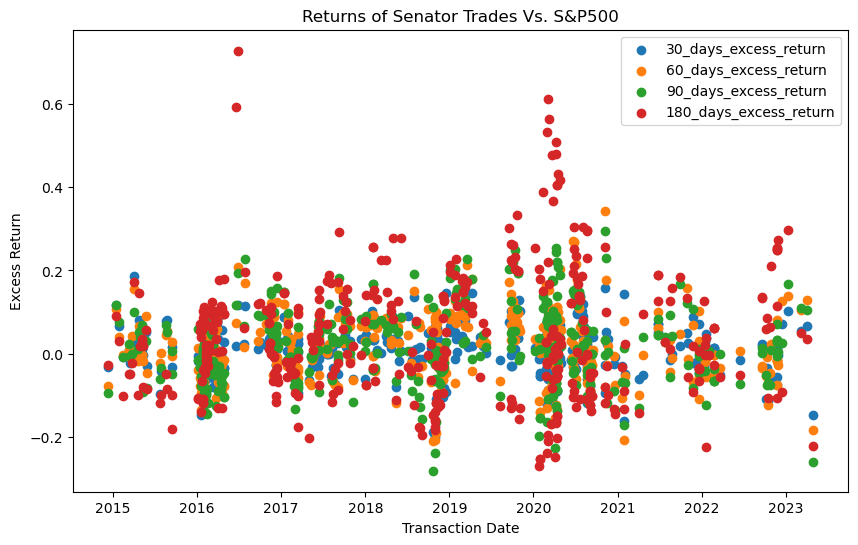

In [126]:
# Convert transaction_date column to datetime
ready_csv_data['transaction_date'] = pd.to_datetime(ready_csv_data['transaction_date'])

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Iterate through the specified columns for excess return
for col in ['30_days_excess_return', '60_days_excess_return', '90_days_excess_return', '180_days_excess_return']:
    # Create a scatter plot with transaction_date on x-axis and the selected excess return column on y-axis
    plt.scatter(ready_csv_data['transaction_date'], ready_csv_data[col], label=col)

# Set labels and title for the plot
plt.xlabel('Transaction Date')
plt.ylabel('Excess Return')
plt.title('Returns of Senator Trades Vs. S&P500')

# Display a legend to differentiate between columns
plt.legend()

# Show the plot
plt.show()


<Axes: xlabel='industry'>

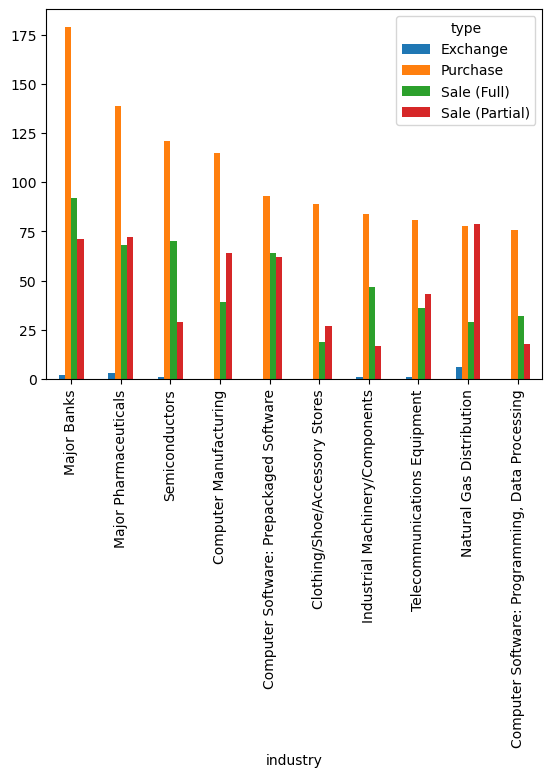

In [127]:
# Visualize the distribution of the top 10 industries based on the type of trade executed, x-axis is indexed by indsutry.
industry_agg=tickers_data_df.pivot_table(index='industry', columns='type', aggfunc='size').fillna(0)
industry_agg.sort_values('Purchase', ascending=False,).head(10).plot(kind='bar')

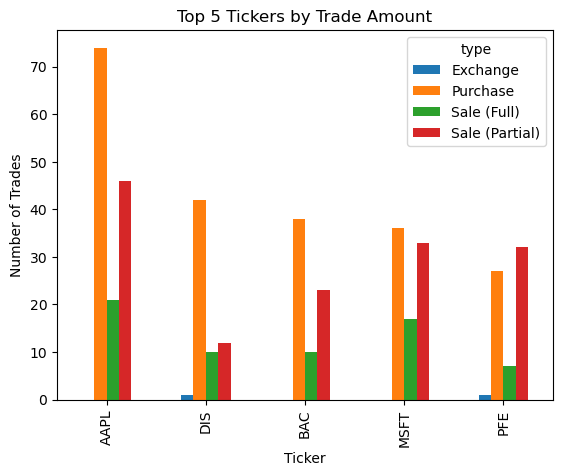

In [128]:
# Create a pivot table to aggregate trade counts based on ticker and type
industry_agg = ready_csv_data.pivot_table(index='ticker', columns='type', aggfunc='size').fillna(0)

# Sort the aggregated data by the 'Purchase' column in descending order
industry_agg_sorted = industry_agg.sort_values(by='Purchase', ascending=False)

# Create a bar plot for the top 5 tickers by trade amount
ax = industry_agg_sorted.head(5).plot(kind='bar')

# Set the title of the plot
ax.set_title('Top 5 Tickers by Trade Amount')

# Set the labels for the x and y axes
ax.set_xlabel('Ticker')
ax.set_ylabel('Number of Trades')

# Display the plot
plt.show()


In [130]:
# Convert transaction_date column to datetime
ready_csv_data['transaction_date'] = pd.to_datetime(ready_csv_data['transaction_date'])

# Define the row index you want to display (row 5 in this case)
display_row_index = 4  # Note that DataFrame indexing is zero-based

# Get the specific row using iloc
displayed_row = ready_csv_data.iloc[display_row_index]

# Display the selected row
print(displayed_row)


transaction_date          2022-11-23 00:00:00
ticker                                   MSFT
type                                 Purchase
amount                               $15,000 
senator                      Tommy Tuberville
30_days_excess_return                0.008366
60_days_excess_return               -0.017993
90_days_excess_return                0.026836
180_days_excess_return               0.253922
Name: 324, dtype: object


In [131]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Calculate date ranges
six_year_end_date = datetime.today()
six_year_start_date = six_year_end_date - timedelta(days=365*9)

# Fetch MSFT data
msft_tickers = yf.Tickers('MSFT')
msft_data = msft_tickers.tickers['MSFT'].history(start=six_year_start_date, end=six_year_end_date)
msft_ticker_df = pd.DataFrame(msft_data)
msft_ticker_df.index = msft_ticker_df.index.date

# Fetch the 'Close' value for the specific date (2023-04-03)
desired_date = datetime(2022, 11, 23).date()
close_value = msft_ticker_df.loc[desired_date, 'Close']

print(f"Close value for Tommy Tuberville MSFT buy on {desired_date}: {close_value}")


Close value for Tommy Tuberville MSFT buy on 2022-11-23: 246.42274475097656


In [132]:
# Get closing tickers for the next 180 days for reference

import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Calculate date ranges
six_year_end_date = datetime.today()
six_year_start_date = six_year_end_date - timedelta(days=365*9)

# Fetch MSFT data
msft_tickers = yf.Tickers('MSFT')
msft_data = msft_tickers.tickers['MSFT'].history(start=six_year_start_date, end=six_year_end_date)
msft_ticker_df = pd.DataFrame(msft_data)

# Convert the index to datetime format
msft_ticker_df.index = pd.to_datetime(msft_ticker_df.index)

# Extract last day of each month
msft_last_days = msft_ticker_df.resample('M').last()

# Filter the DataFrame to include only the desired months
desired_months = ['2022-12', '2023-01', '2023-02', '2023-03']
msft_filtered_ticker_df = msft_last_days[msft_last_days.index.strftime('%Y-%m').isin(desired_months)]


# Print the 'Close' column for the desired months
print(msft_filtered_ticker_df['Close'])


Date
2022-12-31 00:00:00-05:00    238.699020
2023-01-31 00:00:00-05:00    246.651672
2023-02-28 00:00:00-05:00    248.875946
2023-03-31 00:00:00-04:00    287.671112
Freq: M, Name: Close, dtype: float64


In [ ]:
# This concludes our analysis for senator trading within our given time frame, thank you for viewing. :)